# Optimizer Example
MNIST ANN example showing comparison between *newer* optimizers.

Richard Henry, 15-Jul-2024 

In [1]:
#Import Libararies
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

Test Libraries

In [2]:
# Check python version
from platform import python_version
print(python_version())
#3.12.3

3.12.3


In [3]:
# Check tensorflow version
tf.__version__
#2.16.1

'2.16.2'

In [4]:
# Check keras version
tf.keras.__version__
#3.4.1

'3.4.1'

# Optimizer List

## AdaDelta
Adadelta optimization is a stochastic gradient descent method that is based on adaptive learning rate per dimension to address two drawbacks:

- The continual decay of learning rates throughout training.
- The need for a manually selected global learning rate.

Adadelta is a more robust extension of Adagrad that adapts learning rates based on a moving window of gradient updates, instead of accumulating all past gradients. This way, Adadelta continues learning even when many updates have been done. [tensorflow docs]

|Variable|Value|
|---|---|
|Mentioned in Article|Yes|
|Year|2012|
|Short Cut|'adadelta'|
|Default Setting|Yes|

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adadelta

In [5]:
opt001=tf.keras.optimizers.Adadelta(
    learning_rate=0.001,
    rho=0.95,
    epsilon=1e-07,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name='adadelta'
)

## AdaFactor
Adafactor is commonly used in NLP tasks, and has the advantage of taking less memory because it only saves partial information of previous gradients. [tensorflow docs]

|Variable|Value|
|---|---|
|Mentioned in Article|No|
|Year|2018|
|Short Cut|'adafactor'|
|Default Setting|Yes|

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adafactor

In [6]:
opt002=tf.keras.optimizers.Adafactor(
    learning_rate=0.001,
    beta_2_decay=-0.8,
    epsilon_1=1e-30,
    epsilon_2=0.001,
    clip_threshold=1.0,
    relative_step=True,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name='adafactor'
)

## AdaGrad
Adagrad is an optimizer with parameter-specific learning rates, which are adapted relative to how frequently a parameter gets updated during training. The more updates a parameter receives, the smaller the updates. [tensorflow docs]

|Variable|Value|
|---|---|
|Mentioned in Article|Yes|
|Year|2011|
|Short Cut|'adagrad'|
|Default Setting|Yes|

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adagrad

In [7]:
opt003=tf.keras.optimizers.Adagrad(
    learning_rate=0.001,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name='adagrad'
)

## ADAM
Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments. [tensorflow docs]

|Variable|Value|
|---|---|
|Mentioned in Article|duh|
|Year|2015|
|Short Cut|'adam'|
|Default Setting|Yes|

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

In [8]:
opt000=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name='adam'
)

## ADAM with Weight Decay
AdamW optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments with an added method to decay weights. [tensorflow docs]

|Variable|Value|
|---|---|
|Mentioned in Article|No|
|Year|2019|
|Short Cut|'adamw'|
|Default Setting|Yes|

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/AdamW

In [9]:
opt004=tf.keras.optimizers.AdamW(
    learning_rate=0.001,
    weight_decay=0.004,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name='adamw'
)

## AdaMax
A variant of Adam described in the same paper and based on the infinity norm, is a first-order gradient-based optimization method. Due to its capability of adjusting the learning rate based on data characteristics, it is suited to learn time-variant process, e.g., speech data with dynamically changed noise conditions. [tensorflow docs]

|Variable|Value|
|---|---|
|Mentioned in Article|Yes|
|Year|2015|
|Short Cut|'adamax'|
|Default Setting|Yes|

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adamax

In [10]:
opt005=tf.keras.optimizers.Adamax(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name='adamax'
)

## Follow the Regularized Leader
An optimization algorithm developed at Google for click-through rate prediction. It is most suitable for shallow models with large and sparse feature spaces. [tensorflow docs]

|Variable|Value|
|---|---|
|Mentioned in Article|No|
|Year|2013|
|Short Cut|'ftrl'|
|Default Setting|Yes|

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Ftrl

In [11]:
opt006=tf.keras.optimizers.Ftrl(
    learning_rate=0.001,
    learning_rate_power=-0.5,
    initial_accumulator_value=0.1,
    l1_regularization_strength=0.0,
    l2_regularization_strength=0.0,
    l2_shrinkage_regularization_strength=0.0,
    beta=0.0,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name='ftrl'
)

## Lion
A stochastic-gradient-descent method that uses the sign operator to control the magnitude of the update, unlike other adaptive optimizers such as Adam that rely on second-order moments. This make Lion more memory-efficient as it only keeps track of the momentum. [tensorflow docs]

|Variable|Value|
|---|---|
|Mentioned in Article|Hell No|
|Year|2023|
|Short Cut|'lion'|
|Default Setting|Yes|

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Lion

In [12]:
opt007=tf.keras.optimizers.Lion(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.99,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name='lion'
)

## Adam with Nesterov Momentum

Momentum is an approach that accelerates the progress of the search to skim across flat areas and smooth out bouncy gradients. [Brownlee]
Nesterov momentum is an extension of momentum that involves calculating the decaying moving average of the gradients of projected positions in the search space rather than the actual positions themselves. [Also Brownlee]

|Variable|Value|
|---|---|
|Mentioned in Article|No|
|Year|2015|
|Short Cut|'nadam'|
|Default Setting|Yes|

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Nadam

In [13]:
opt008=tf.keras.optimizers.Nadam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name='nadam'
)

## Root Mean Square Propagation
ADAM is an extension of this.

The gist of RMSprop is to:

- Maintain a moving (discounted) average of the square of gradients
- Divide the gradient by the root of this average

[tensorflow docs]

|Variable|Value|
|---|---|
|Mentioned in Article|Yup|
|Year|2012|
|Short Cut|'rmsprop'|
|Default Setting|Yes|

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop

In [14]:
opt009=tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name='rmsprop'
)

## Stochastic Gradient Descent
Gradient descent is an optimization algorithm that follows the negative gradient of an objective function in order to locate the minimum of the function. [Brownlee] Instead of updating weights based on the sum of the accumulated errors over all training examples, we update parameters incrementally for each training example. Although SGD can be considered an approximation of gradient descent, it typically reaches convergence faster because of more frequent weight updates.[Raschka]

|Variable|Value|
|---|---|
|Mentioned in Article|Yes|
|Year|a really long time ago|
|Short Cut|'SGD'<-- notice CAPS!|
|Default Setting|Yes|

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD

In [15]:
opt010=tf.keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name='SGD'
)

## SGD with Momentum
Increase `momentum` above zero and below unity. Not sure it is used.

|Variable|Value|
|---|---|
|Mentioned in Article|Yes|
|Year|a really long time ago|
|Short Cut|'mSGD'|
|Default Setting|No|

In [16]:
opt011=tf.keras.optimizers.SGD(momentum=0.5,
                               name='mSGD'
                              )

## SGD with Nesterov Momentum
Increase `momentum` above zero and below unity. Set `nesterov` to `True`.

|Variable|Value|
|---|---|
|Mentioned in Article|Yes|
|Year|a really long time ago|
|Short Cut|'nSGD'|
|Default Setting|No|

In [17]:
opt012=tf.keras.optimizers.SGD(momentum=0.5,
                               nesterov=True,
                               name='nSGD'
                              )

## RMSprop with Momentum
Increase `momentum` above zero and below unity.  Notice we can't use Nesterov here.

|Variable|Value|
|---|---|
|Mentioned in Article|Yes|
|Year|who knows|
|Short Cut|'nRMS'|
|Default Setting|No|

In [18]:
opt013=tf.keras.optimizers.RMSprop(momentum=0.5,
                                   name='nRMS'
                                  )

## Natural Gradient Descent

|Variable|Value|
|---|---|
|Mentioned in Article|Unfortunately, yes|
|Year|1998|
|Short Cut|'NGD'|
|Default Setting|No clue|

Can we like, ignore this one?

https://www.geeksforgeeks.org/optimizers-in-tensorflow/

In [19]:
opt999=tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001, 
                                                    use_locking=True,
                                                    name = 'NGD')

## Unavailable
Optimizers mentioned in the article but not available in tensorflow 2

- vSGD (Schaul et al, 2012)

- natural Newton (Roux & Fitzgibbon, 2012)

- SFO (Sohl & Dickstein, 2014)

# MNIST ANN
This shows how I would build up a story by generating the same model several times and plot the results cumulatively.  Here we are looking at optimizers that appeared *after* Adam.

Adapted from mvsjober on Github.
https://github.com/CSCfi/machine-learning-scripts/blob/master/notebooks/keras-mnist-mlp.ipynb

In [20]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28)
batch_size = 128
num_epochs = 15

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [21]:
# Build & train model function
def model_build(myOpti,
                myClas,
                myShap,
                myBatc,
                myEpoc,
                myxTra,
                myyTra,
                myxTes,
                myyTes):
    #Build it exactly the same every time
    tf.random.set_seed(19) 
    model = tf.keras.Sequential(
        [
            tf.keras.Input(shape=myShap),
            #tf.keras.layers.Rescaling(1.0/255),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, 
                                  activation="relu"),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Dense(64, 
                                  activation="relu"),
            tf.keras.layers.Dropout(0.15),
            tf.keras.layers.Dense(myClas, 
                                  activation="softmax"),
        ]
    )
    model.compile(loss="categorical_crossentropy", 
                  optimizer=myOpti, 
                  metrics=["accuracy"])
    myHis=model.fit(myxTra, 
                    myyTra, 
                    batch_size=myBatc, 
                    epochs=myEpoc, 
                    validation_split=0.1)
    score = model.evaluate(myxTes, 
                           myyTes, 
                           verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    return myHis

### First Model, LION

In [22]:
%%time
h0=model_build('lion',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7803 - loss: 0.7012 - val_accuracy: 0.9615 - val_loss: 0.1350
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9333 - loss: 0.2259 - val_accuracy: 0.9642 - val_loss: 0.1215
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9387 - loss: 0.2101 - val_accuracy: 0.9705 - val_loss: 0.1085
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9428 - loss: 0.1963 - val_accuracy: 0.9683 - val_loss: 0.1146
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9433 - loss: 0.1956 - val_accuracy: 0.9697 - val_loss: 0.1116
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9476 - loss: 0.1833 - val_accuracy: 0.9717 - val_loss: 0.1076
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9493 - loss: 0.1860 - val_accuracy: 0.9687 - val_loss: 0.1127
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9494 - loss: 0.1822 - val_accuracy: 0.

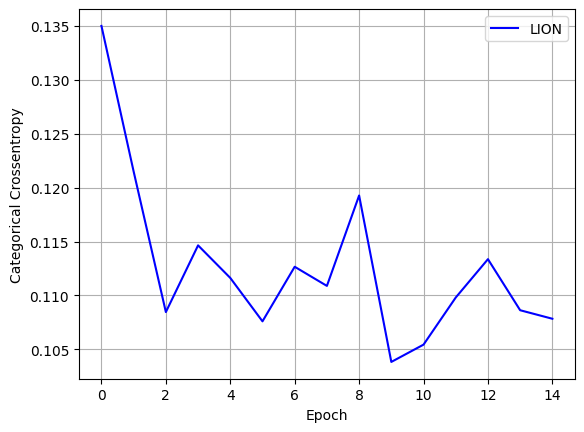

In [23]:
plt.plot(h0.history['val_loss'],color='blue',linestyle='solid')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['LION'])
plt.grid()
plt.show()

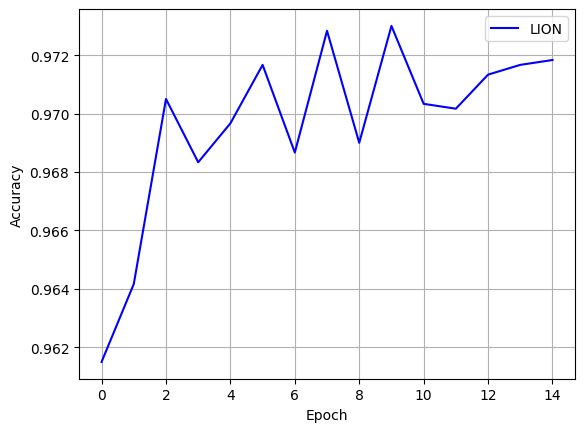

In [24]:
plt.plot(h0.history['val_accuracy'],color='blue',linestyle='solid')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION'])
plt.grid()
plt.show()

#### Commentary
Lorem Ipsum
### Second Model, AdaFactor

In [25]:
%%time
h1=model_build('adafactor',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1135 - loss: 2.3046 - val_accuracy: 0.1050 - val_loss: 2.3026
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1149 - loss: 2.3026 - val_accuracy: 0.1050 - val_loss: 2.3026
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1149 - loss: 2.3026 - val_accuracy: 0.1050 - val_loss: 2.3026
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1149 - loss: 2.3026 - val_accuracy: 0.1050 - val_loss: 2.3026
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1149 - loss: 2.3025 - val_accuracy: 0.1050 - val_loss: 2.3026
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1149 - loss: 2.3025 - val_accuracy: 0.1050 - val_loss: 2.3025
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1149 - loss: 2.3025 - val_accuracy: 0.1050 - val_loss: 2.3025
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1149 - loss: 2.3025 - val_accuracy: 0.

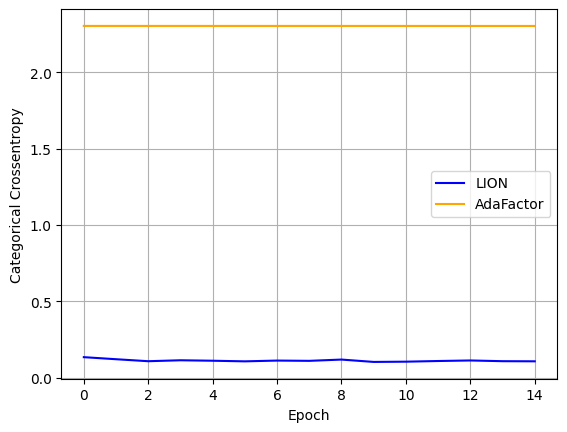

In [26]:
plt.plot(h0.history['val_loss'],color='blue',linestyle='solid')
plt.plot(h1.history['val_loss'],color='orange',linestyle='solid')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor'])
plt.grid()
plt.show()

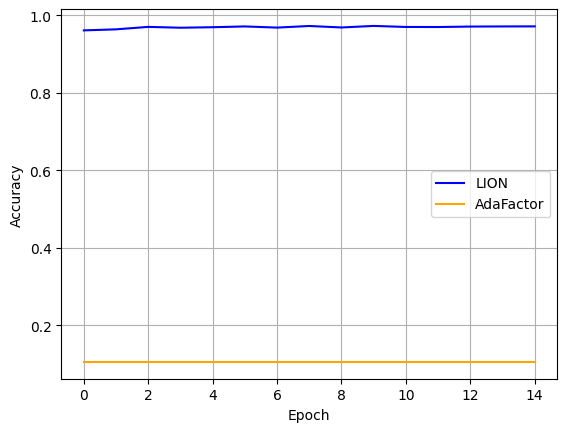

In [27]:
plt.plot(h0.history['val_accuracy'],color='blue',linestyle='solid')
plt.plot(h1.history['val_accuracy'],color='orange',linestyle='solid')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor'])
plt.grid()
plt.show()

#### Commentary
Lorem Impsum
### Third Model, Adam + Weight Decay

In [28]:
%%time
h2=model_build(opt012,num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4378 - loss: 1.7191 - val_accuracy: 0.8973 - val_loss: 0.4386
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8079 - loss: 0.6387 - val_accuracy: 0.9175 - val_loss: 0.3092
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8500 - loss: 0.4987 - val_accuracy: 0.9275 - val_loss: 0.2608
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8755 - loss: 0.4272 - val_accuracy: 0.9327 - val_loss: 0.2306
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8866 - loss: 0.3863 - val_accuracy: 0.9392 - val_loss: 0.2096
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8941 - loss: 0.3568 - val_accuracy: 0.9435 - val_loss: 0.1932
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9025 - loss: 0.3281 - val_accuracy: 0.9485 - val_loss: 0.1790
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9083 - loss: 0.3071 - val_accuracy: 0.

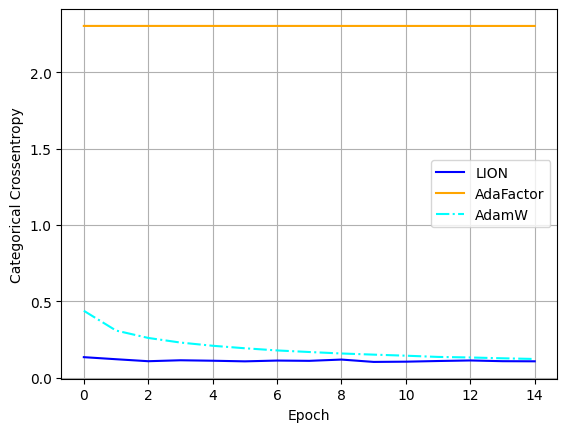

In [29]:
plt.plot(h0.history['val_loss'],color='blue',linestyle='solid')
plt.plot(h1.history['val_loss'],color='orange',linestyle='solid')
plt.plot(h2.history['val_loss'],color='cyan',linestyle='dashdot')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor','AdamW'])
plt.grid()
plt.show()

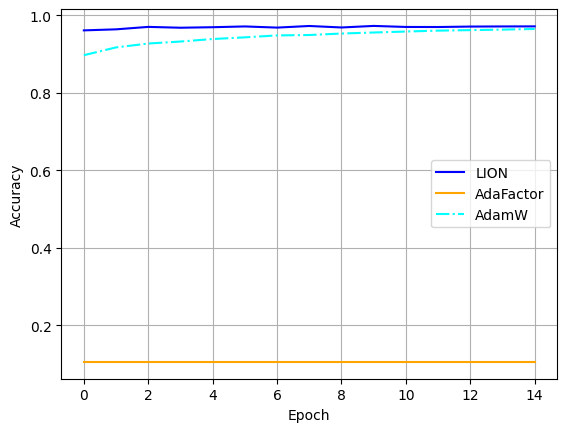

In [30]:
plt.plot(h0.history['val_accuracy'],color='blue',linestyle='solid')
plt.plot(h1.history['val_accuracy'],color='orange',linestyle='solid')
plt.plot(h2.history['val_accuracy'],color='cyan',linestyle='dashdot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor','AdamW'])
plt.grid()
plt.show()

#### Commentary
Lorem Ipsum
### 4th Model, Adam

In [31]:
h3=model_build('adam',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7340 - loss: 0.8447 - val_accuracy: 0.9585 - val_loss: 0.1446
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9308 - loss: 0.2340 - val_accuracy: 0.9695 - val_loss: 0.1045
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9474 - loss: 0.1740 - val_accuracy: 0.9723 - val_loss: 0.0935
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9554 - loss: 0.1444 - val_accuracy: 0.9740 - val_loss: 0.0861
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9620 - loss: 0.1211 - val_accuracy: 0.9762 - val_loss: 0.0759
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9677 - loss: 0.1049 - val_accuracy: 0.9775 - val_loss: 0.0744
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9706 - loss: 0.0962 - val_accuracy: 0.9783 - val_loss: 0.0734
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9723 - loss: 0.0880 - val_accuracy: 0.

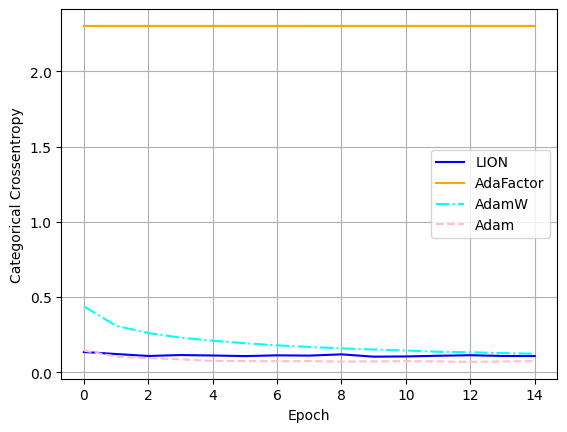

In [32]:
plt.plot(h0.history['val_loss'],color='blue',linestyle='solid')
plt.plot(h1.history['val_loss'],color='orange',linestyle='solid')
plt.plot(h2.history['val_loss'],color='cyan',linestyle='dashdot')
plt.plot(h3.history['val_loss'],color='pink',linestyle='dashed')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor','AdamW','Adam'])
plt.grid()
plt.show()

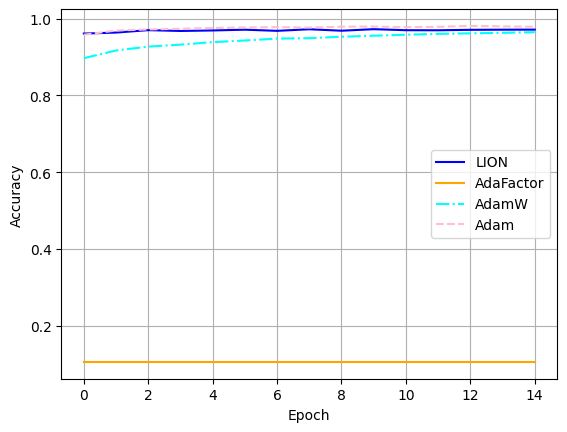

In [33]:
plt.plot(h0.history['val_accuracy'], color='b',linestyle='solid')
plt.plot(h1.history['val_accuracy'], color='orange',linestyle='solid')
plt.plot(h2.history['val_accuracy'], color='cyan',linestyle='dashdot')
plt.plot(h3.history['val_accuracy'], color='pink',linestyle='dashed')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor','AdamW','Adam'])
plt.grid()
plt.show()

#### Comment
lorem ipsum
# Conclusions
Blah blah blah